In [1]:
![Sample Dog Output](img_folder/k-means.png)

/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `[Sample Dog Output](img_folder/k-means.png)'


In [1]:
import numpy as np
import random
import sys
from tqdm import tqdm
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
class KMeansCluster:
    def __init__(self, ndarray, cluster_num):
        self.ndarray = ndarray
        self.cluster_num = cluster_num
        self.points = self.__pick_start_point(ndarray, cluster_num)

    def __pick_start_point(self, ndarray, cluster_num):
        if cluster_num < 0 or cluster_num > ndarray.shape[0]:
            raise Exception('Cluster nums Err.')

        # random center cord
        indexes = random.sample(np.arange(0, ndarray.shape[0]).tolist(), cluster_num)
        points = []
        for idx in indexes:
            points.append(ndarray[idx].tolist())
        return points

    def cluster(self):
        result = []
        for i in range(self.cluster_num):
            result.append([])
        for p in tqdm(self.ndarray, ncols=80):
            distance_min = sys.maxsize
            idx = -1
            for i in range(len(self.points)):
                distance = self.__distance(p, self.points[i])
                if distance < distance_min:
                    distance_min = distance
                    idx = i
            result[idx].append(p.tolist())
        new_center = []
        for item in result:
            new_center.append(self.__center(item).tolist())
        # print(type(new_center), type(self.points))
        if (self.points == new_center):
            return result, new_center
        self.points = new_center
        return self.cluster()

    ## Compute avg val of every column
    def __center(self, list):
        return np.array(list).mean(axis=0)

    ## Compute distance between two points
    def __distance(self, p1, p2):
        tmp = 0
        for i in range(len(p1)):
            tmp += pow(p1[i] - p2[i], 2)
        return pow(tmp, 0.5)


100%|██████████████████████████████████████| 666/666 [00:00<00:00, 24329.63it/s]


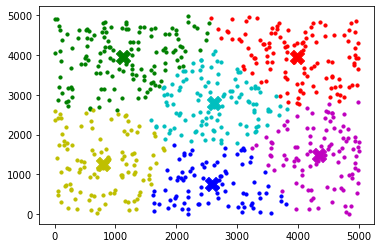

In [3]:

def ramdomGenPoints(nums):
    random_n_list = np.random.randint(0, 5000, size=(nums,2))
    return random_n_list


if __name__ == '__main__':
    random_list = ramdomGenPoints(666)
    colors = ['r', 'g', 'b', 'y', 'c', 'm']
    k = KMeansCluster(random_list, len(colors))
    result, center = k.cluster()
    # print(len(result), result)

    plt.figure()
    for i in range(len(colors)):
        plt.scatter(center[i][0], center[i][1], marker='X', color=colors[i], s=200)
        for p in result[i]:
            plt.scatter(p[0], p[1], marker='o', color=colors[i], s=10)
    plt.show()